<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/Bathymetry_and_Magnetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource
from matplotlib import colors as mcolors

In [14]:
# Implementing Magnetization of the CS_ridge
ascname = "9NMag.asc"
f = open(ascname, "r")

# Read by Lines
for i, line in enumerate(f):
    if i < 7:
      line = line.strip()
      columns = line.split()

      # Read by Header
      if columns[0] == 'ncols':
        ncols = int(columns[1])
      if columns[0] == 'nrows':
        nrows = int(columns[1])
      if columns[0] == 'xllcorner':
        xllcorner = float(columns[1])
      if columns[0] == 'yllcorner':
        yllcorner = float(columns[1])
      if columns[0] == 'cellsize':
        cellsize = float(columns[1])
      if columns[0] == 'nodata_value':
        nodata_value = float(columns[1])

# Create X,Y Mesh
x = cellsize * np.arange(ncols) + xllcorner
y = cellsize * np.arange(nrows) + yllcorner

# Read in the Lines
datamat = np.genfromtxt(ascname, skip_header=6,dtype = float)

# Substitute the nodata value
datamat [datamat == nodata_value] = 'nan'

In [15]:
# Import ridge data
data = pd.read_csv('CS_ridge.csv')
data.head()

,LON,LAT
0,-102.860,8.100
1,-102.910,8.399
2,-103.105,8.325
3,-103.130,8.355
4,-103.300,8.310


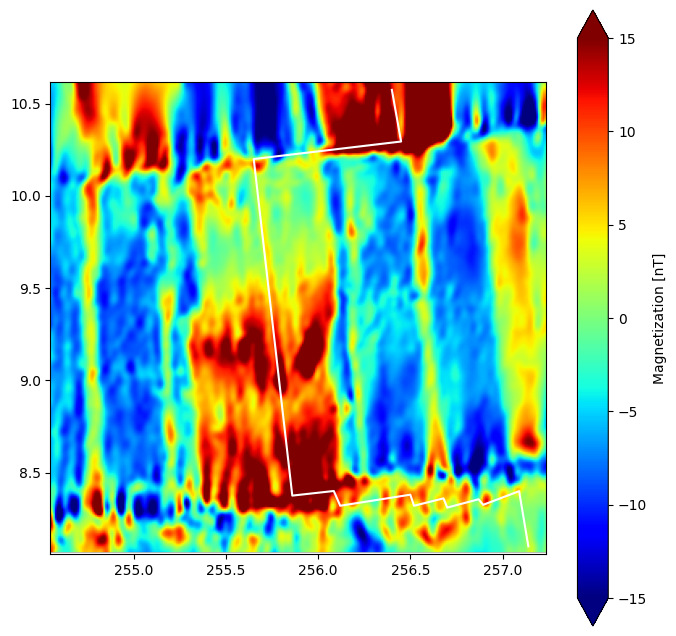

In [21]:
# Plotting Magnetization
fig, axl = plt.subplots()
cs = plt.imshow(datamat, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'jet', vmin = -15, vmax = 15)
plt.plot(data.LON+360, data.LAT, 'w-')
fig = plt.gcf()
fig.set_size_inches(8,8)
cbar = fig.colorbar(cs, extend = 'both', ax = axl)
cbar.ax.set_ylabel('Magnetization [nT]')
plt.show()
fig.savefig('Magnetization of the CS_ridge.pdf')

In [33]:
# Implementing Bathmetry of the CS_ridge
ascname2 = "9NBath.asc"
f2 = open(ascname2, "r")

# Read by Lines
for i, line in enumerate(f2):
    if i < 7:
      line = line.strip()
      columns = line.split()

      # Read by Header
      if columns[0] == 'ncols':
        ncols = int(columns[1])
      if columns[0] == 'nrows':
        nrows = int(columns[1])
      if columns[0] == 'xllcorner':
        xllcorner = float(columns[1])
      if columns[0] == 'yllcorner':
        yllcorner = float(columns[1])
      if columns[0] == 'cellsize':
        cellsize = float(columns[1])
      if columns[0] == 'nodata_value':
        nodata_value = float(columns[1])

# Create X,Y Mesh
x2 = cellsize * np.arange(ncols) + xllcorner
y2 = cellsize * np.arange(nrows) + yllcorner

# Read in the Lines
datamat2 = np.genfromtxt(ascname, skip_header=6,dtype = float)

# Substitute the nodata value
datamat2 [datamat2 == nodata_value] = 'nan'

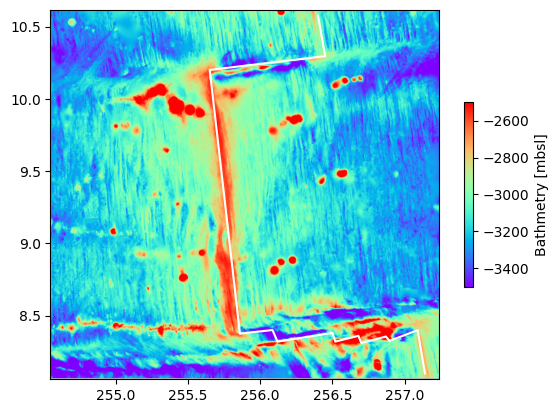

In [37]:
# Plotting Bathmetry
fig2, ax2 = plt.subplots()
cs = plt.imshow(datamat2, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'rainbow', vmin = -3500, vmax = -2500)
plt.plot(data.LON+360, data.LAT, 'w-')
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax2)
cbar.ax.set_ylabel('Bathmetry [mbsl]')
plt.show()
fig.savefig('Bathmetry of the CS_ridge.pdf')

In [35]:
# Confirm Latitude for Transecting line
n = 165
n2 = 330
print(y[n], y2[n2])

# Array profile for x vs y
ymag = np.ones(np.size(x))*y[n]
ybath = np.ones(np.size(x2))*y2[n2]

9.50942493970018 9.50942493970018


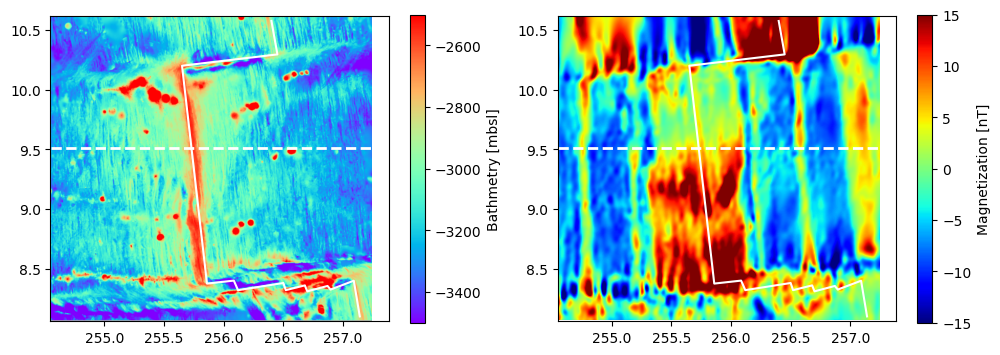

In [36]:
# Plotting side by side
fig, cax = plt.subplots(1,2, figsize = (12,8))
ax2 = plt.subplot(121)
cs = plt.imshow(datamat2, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'rainbow', vmin = -3500, vmax = -2500)
plt.plot(data.LON+360, data.LAT, 'w-')
plt.plot(x2+360, ybath, 'w--', linewidth = 2)
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax2)
cbar.ax.set_ylabel('Bathmetry [mbsl]')

ax1 = plt.subplot(122)
cs = plt.imshow(datamat, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'jet', vmin = -15, vmax = 15)
plt.plot(data.LON+360, data.LAT, 'w-')
plt.plot(x2+360, ybath, 'w--', linewidth = 2)
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax1)
cbar.ax.set_ylabel('Magnetization [nT]')

plt.show()
fig.savefig('Bathmetry and Magnetization of the CS_ridge.pdf')

In [43]:
# Export line of the Magnetics to Illustrate the reversals
mag = datamat[n, :]
bath = datamat2[n2, :]

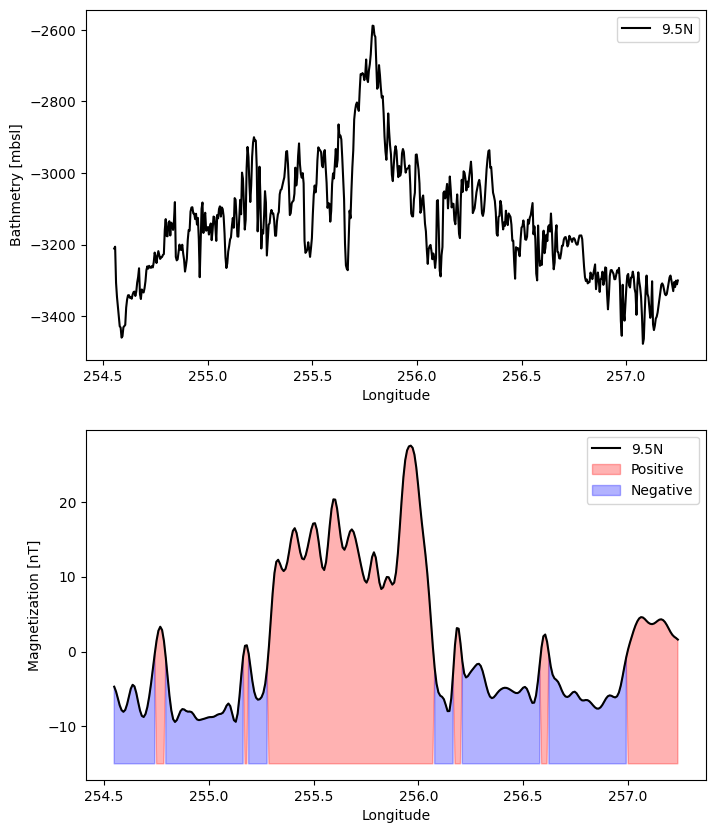

In [44]:
fig, cax = plt.subplots(2, 1, figsize = (8,10))
plt.subplot(211)
plt.plot(x2 + 360, bath, 'k', label = '9.5N')
plt.xlabel('Longitude')
plt.ylabel('Bathmetry [mbsl]')
plt.legend()

plt.subplot(212)
plt.plot(x, map, 'k', label = '9.5N')
plt.xlabel('Longitude')
plt.ylabel('Magnetization [nT]')
plt.fill_between(x, mag, -15, where = (mag >= 0), alpha = 0.3, color = 'red', interpolate = True, label = 'Positive')
plt.fill_between(x, mag, -15, where = (mag < 0), alpha = 0.3, color = 'blue', interpolate = True, label = 'Negative')
plt.legend()

plt.show()
fig.savefig('Line of the Magnetics.pdf')

In [45]:
# Convert to Distances from degrees to interpert Length of the reversal
# Find the Ridge Axis
axis = np.where(bath == np.max(bath)) #shallowest point

# Determine distance from dergees in Kilometers
x2_km = (x2 - np.min(x2))*111
x_km = (x - np.min(x))*111

print(x2_km[axis])
print(x_km[axis])

[137.06982422]
[274.13964844]


In [ ]:
fig, ax = plt.subplots()
plt.plot(x, map, 'k', label = '9.5N')
plt.xlabel('Longitude')
plt.ylabel('Magnetization [nT]')
plt.fill_between(x, mag, -15, where = (mag >= 0), alpha = 0.3, color = 'red', interpolate = True, label = 'Positive')
plt.fill_between(x, mag, -15, where = (mag < 0), alpha = 0.3, color = 'blue', interpolate = True, label = 'Negative')

fig = plt.gcf()
fig.set_size_inches(10,6)

# Dont allow the grid on top of Data
ax.set_axisbelow(True)
# Turn On Minor Tick Marks
ax.minorticks_on()
# Custo

plt.legend()
plt.show()
fig.savefig('Line of the Magnetics.pdf')